In [1]:
import pyemma
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('ticks')
import numpy as np
from glob import glob
import scipy

In [2]:
scores = np.load('scores_msmlag10ns_splittica_alleigen.npy')

In [3]:
def get_order(no_eigenvalues):
    
    current_choice = no_eigenvalues  # number of eigenvalues

    output = scores
    eigenvalues_no = 49 # how many numbers of eigenvalues we've tried
    eigenvalues_index = current_choice - 2 # this is actual number of eigenvalues - 2

    # test scores

    y_kinetic = []
    y_commute = []
    tic_nos_kinetic = []
    tic_nos_commute = []

    for model in output[1]:
        y_kinetic_ = []
        y_commute_ = []
        tic_nos_kinetic_ = []
        tic_nos_commute_ = []
        if isinstance(model[0], list):
            for replicate in model[eigenvalues_index::eigenvalues_no]:
                y_kinetic_.append(replicate[0][0])
                y_commute_.append(replicate[0][1])
                tic_nos_kinetic_.append(replicate[1][0])
                tic_nos_commute_.append(replicate[1][1])
        else:
            for replicate in model[eigenvalues_index::eigenvalues_no]:
                y_kinetic_.append(replicate[0])
                y_commute_.append(replicate[1])
        y_kinetic.append(np.array(y_kinetic_))
        y_commute.append(np.array(y_commute_))
        if tic_nos_kinetic_:
            tic_nos_kinetic.append(np.max(tic_nos_kinetic_))
        else:
            tic_nos_kinetic.append(None)
        if tic_nos_commute_:
            tic_nos_commute.append(np.max(tic_nos_commute_))
        else:
            tic_nos_commute.append(None)

    y = y_kinetic + y_commute

    x = []

    for index, model in enumerate(output[0]):
        if tic_nos_kinetic[index]:
            x.append(str(('kinetic', model[0], str(model[1]) + ': ' + str(tic_nos_kinetic[index]), model[2], model[3])))
        else:
            x.append(str(('kinetic', model[0], model[1], model[2], model[3])))
    for index, model in enumerate(output[0]):
        if tic_nos_commute[index]:
            x.append(str(('commute', model[0], str(model[1]) + ': ' + str(tic_nos_commute[index]), model[2], model[3])))
        else:
            x.append(str(('commute', model[0], model[1], model[2], model[3])))

    order_means = []
    #just_means = []
    for index, model in enumerate(x):
        order_means.append((model, np.mean(y[index])))
        #just_means.append(np.mean(y[index]))
    order_means = sorted(order_means, key = lambda i: i[1], reverse=True)
    order = [i[0] for i in order_means]
    
    # for those with 95p tics, remove the number of tics, so the labels between two nos of eigen are the same
    order_ = []
    for model in order:
        split = model.split(', ')
        if split[2][:4] == "'95p":
            new_model = split[0] + ", " + split[1] + ", " + split[2][:4] + "', " + split[3] + ", " + split[4]
            order_.append(new_model)
        else:
            order_.append(model)
            
    
    return order_

In [4]:
correlations = np.zeros((49,49))

for i in np.arange(2,51):
    for j in np.arange(2,51):
        order1 = get_order(i)
        order2 = get_order(j)
        
        order_of_models = dict()

        for x in range(len(order1)):
            order_of_models[order1[x]] = x
            
        reorder1 = range(len(order1))
        
        reorder2 = []

        for model in order2:
            reorder2.append(order_of_models[model])
            
        correlations[i-2,j-2] = scipy.stats.spearmanr(reorder1, reorder2)[0]

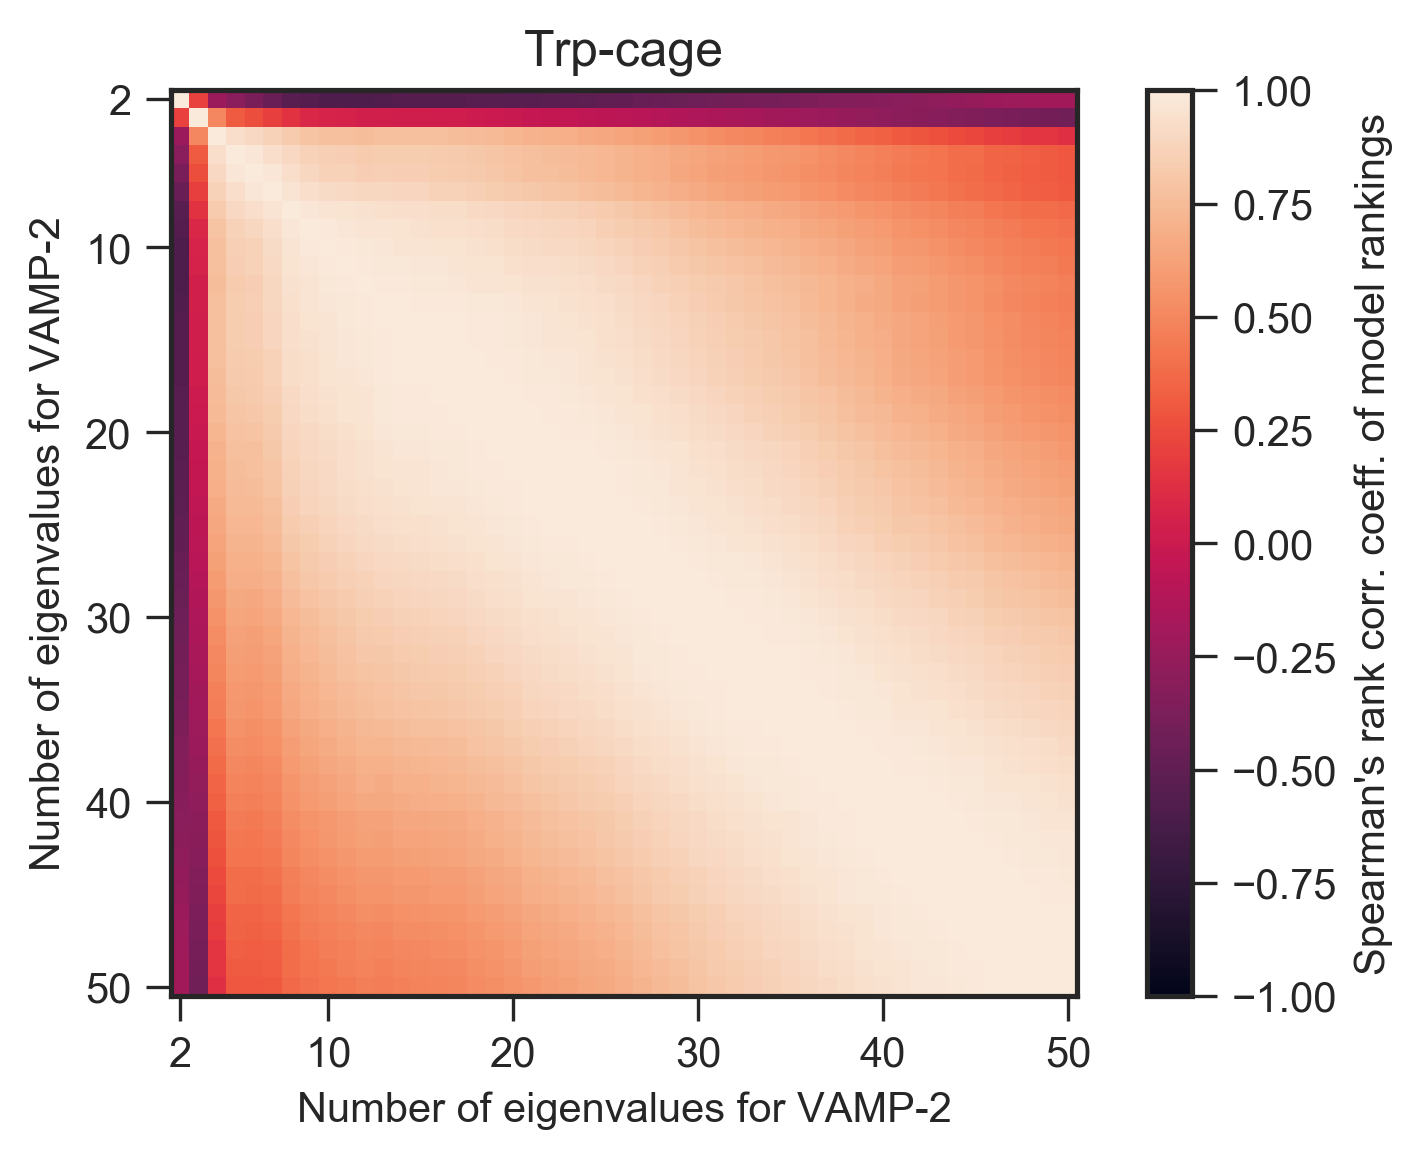

In [11]:
plt.figure(dpi=300)
plt.imshow(correlations, vmin=-1, vmax=1)
cbar = plt.colorbar()
plt.xticks([0,8,18,28,38,48], [2,10,20,30,40,50])
plt.yticks([0,8,18,28,38,48], [2,10,20,30,40,50])
plt.xlabel('Number of eigenvalues for VAMP-2')
plt.ylabel('Number of eigenvalues for VAMP-2')
cbar.set_label("Spearman's rank corr. coeff. of model rankings")
plt.title('Trp-cage')
plt.savefig('trpcage_eigen_rank_correlations.png', dpi=300)
plt.show()

In [12]:
# 50 ns

In [13]:
scores = np.load('50ns/scores_msmlag50ns_splittica_alleigen.npy')

In [14]:
correlations = np.zeros((49,49))

for i in np.arange(2,51):
    for j in np.arange(2,51):
        order1 = get_order(i)
        order2 = get_order(j)
        
        order_of_models = dict()

        for x in range(len(order1)):
            order_of_models[order1[x]] = x
            
        reorder1 = range(len(order1))
        
        reorder2 = []

        for model in order2:
            reorder2.append(order_of_models[model])
            
        correlations[i-2,j-2] = scipy.stats.spearmanr(reorder1, reorder2)[0]

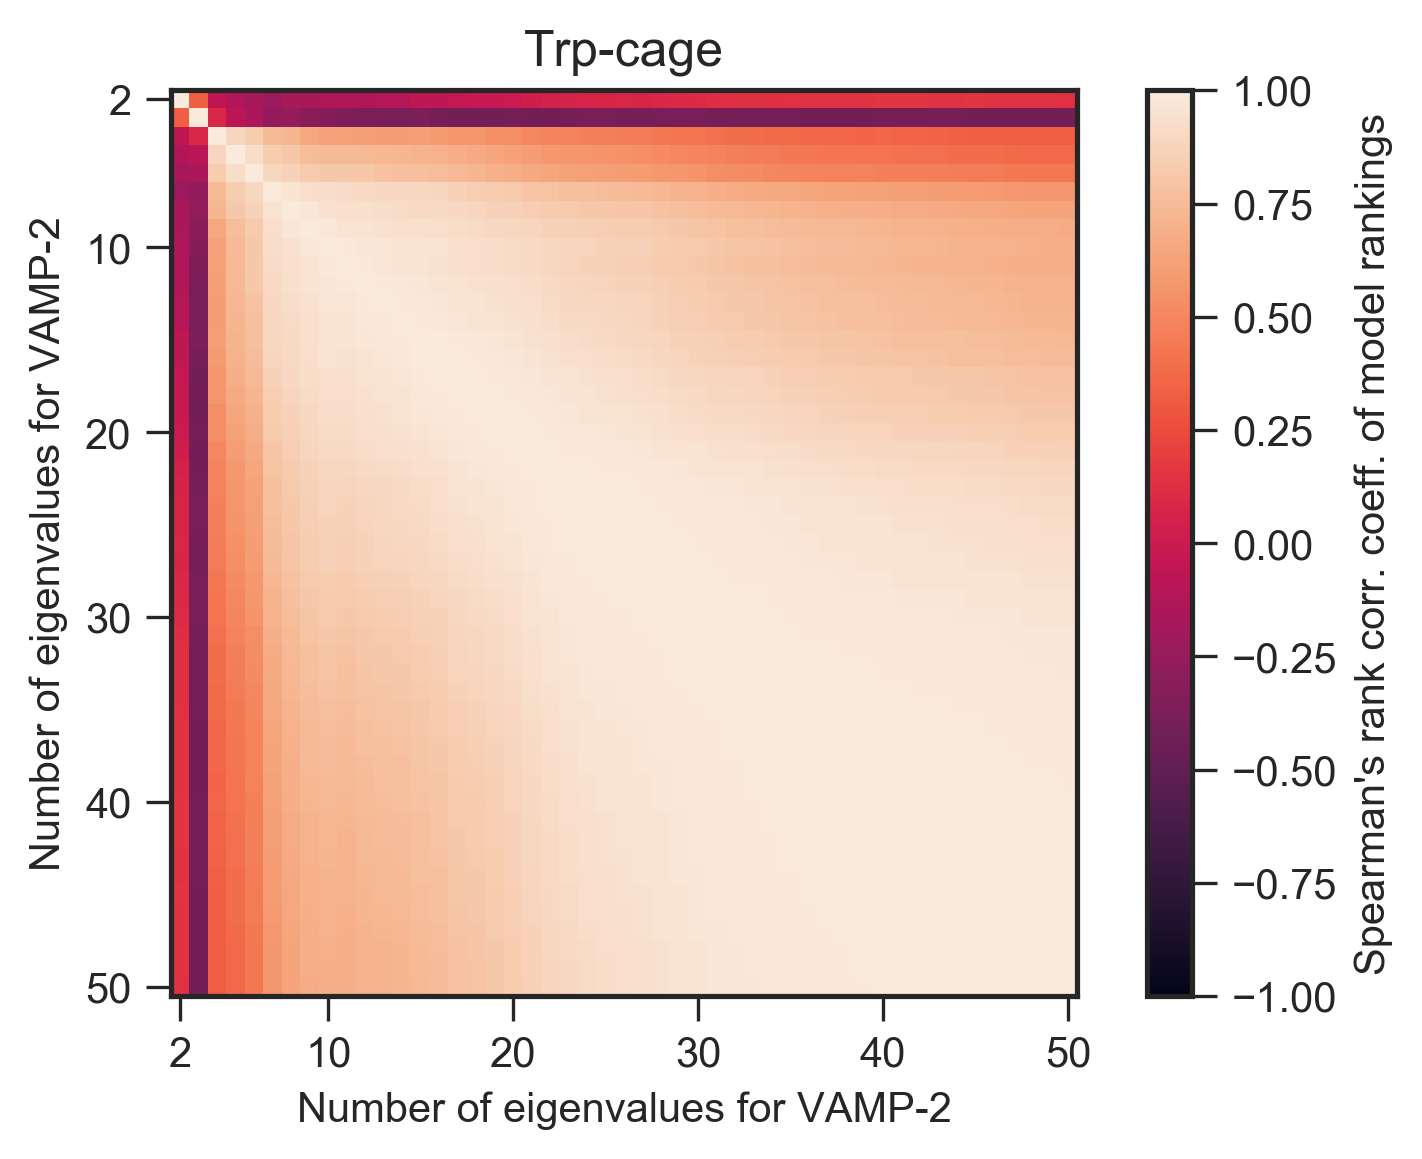

In [16]:
plt.figure(dpi=300)
plt.imshow(correlations, vmin=-1, vmax=1)
cbar = plt.colorbar()
plt.xticks([0,8,18,28,38,48], [2,10,20,30,40,50])
plt.yticks([0,8,18,28,38,48], [2,10,20,30,40,50])
plt.xlabel('Number of eigenvalues for VAMP-2')
plt.ylabel('Number of eigenvalues for VAMP-2')
cbar.set_label("Spearman's rank corr. coeff. of model rankings")
plt.title('Trp-cage')
plt.savefig('trpcage_eigen_rank_correlations_lag50ns.png', dpi=300)
plt.show()

In [17]:
# 100 ns

In [19]:
scores = np.load('100ns/scores_msmlag100ns_splittica_alleigen.npy')

In [20]:
correlations = np.zeros((49,49))

for i in np.arange(2,51):
    for j in np.arange(2,51):
        order1 = get_order(i)
        order2 = get_order(j)
        
        order_of_models = dict()

        for x in range(len(order1)):
            order_of_models[order1[x]] = x
            
        reorder1 = range(len(order1))
        
        reorder2 = []

        for model in order2:
            reorder2.append(order_of_models[model])
            
        correlations[i-2,j-2] = scipy.stats.spearmanr(reorder1, reorder2)[0]

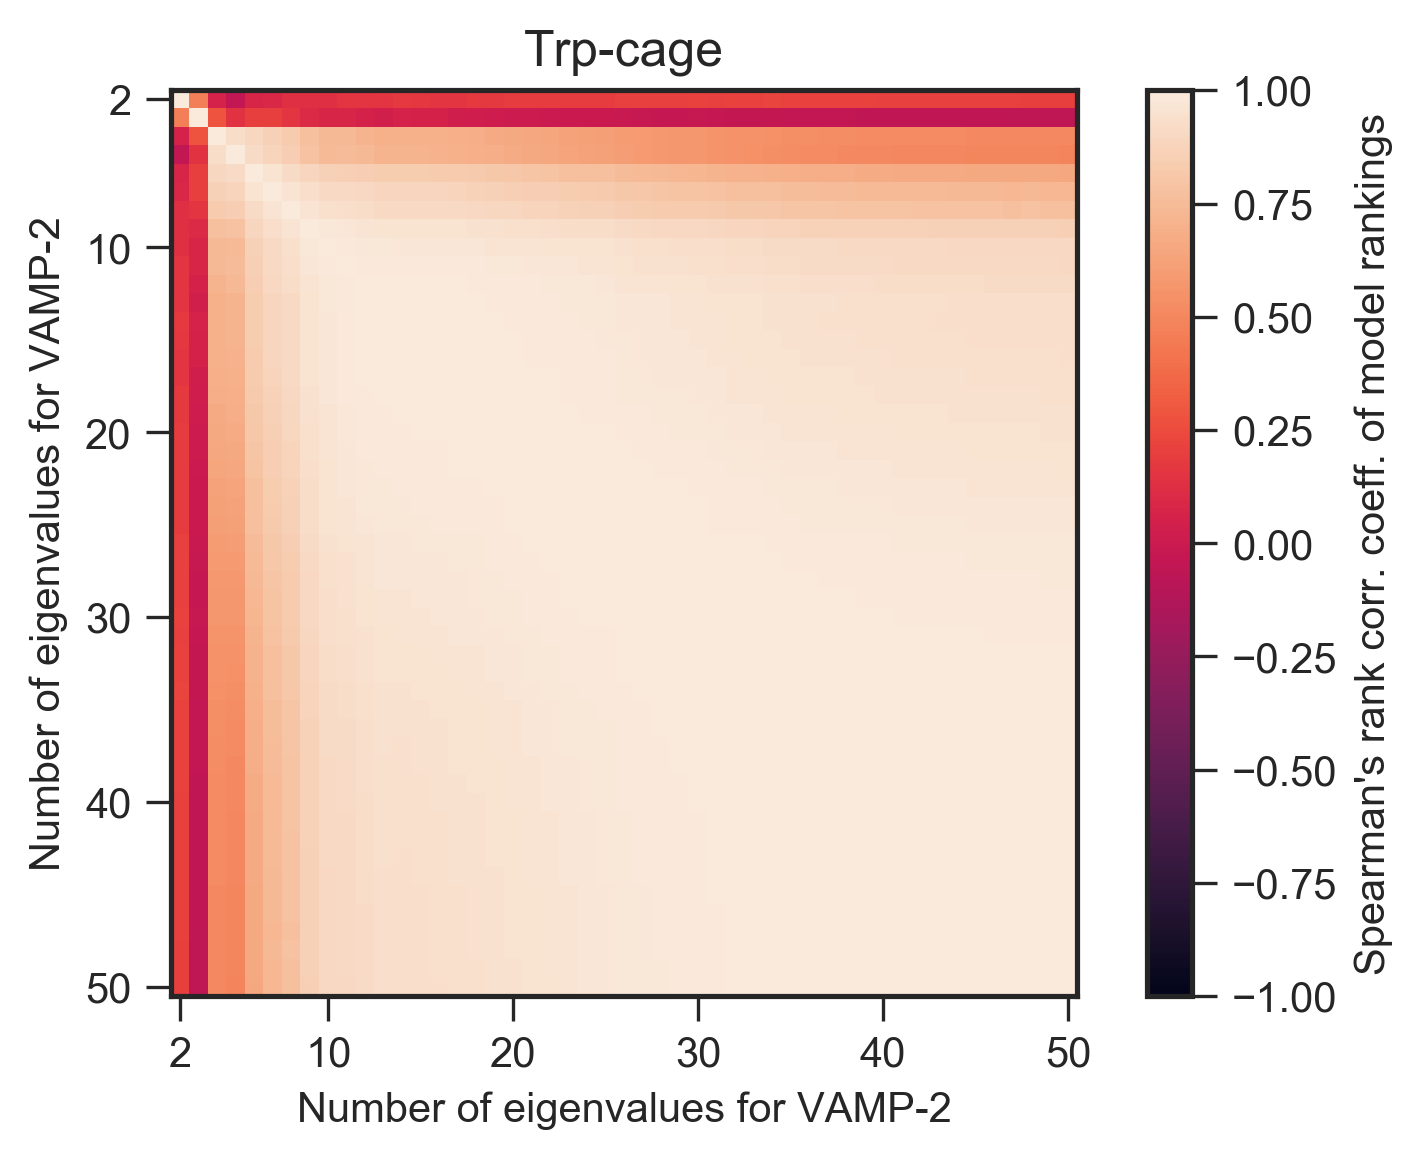

In [21]:
plt.figure(dpi=300)
plt.imshow(correlations, vmin=-1, vmax=1)
cbar = plt.colorbar()
plt.xticks([0,8,18,28,38,48], [2,10,20,30,40,50])
plt.yticks([0,8,18,28,38,48], [2,10,20,30,40,50])
plt.xlabel('Number of eigenvalues for VAMP-2')
plt.ylabel('Number of eigenvalues for VAMP-2')
cbar.set_label("Spearman's rank corr. coeff. of model rankings")
plt.title('Trp-cage')
plt.savefig('trpcage_eigen_rank_correlations_lag100ns.png', dpi=300)
plt.show()

In [22]:
# now we set the number of eigenvalues and do a lag time vs lag time matrix

In [2]:
scores = [
np.load('scores_msmlag10ns_splittica_alleigen.npy'),
np.load('50ns/scores_msmlag50ns_splittica_alleigen.npy'),
np.load('100ns/scores_msmlag100ns_splittica_alleigen.npy')
]

In [12]:
def get_order_lag(no_eigenvalues, lag):
    
    current_choice = no_eigenvalues  # number of eigenvalues

    # lag is 0, 1 or 2 meaning 10ns, 50ns, 100ns
    
    output = scores[lag]
    
    #output = scores
    eigenvalues_no = 49 # how many numbers of eigenvalues we've tried
    eigenvalues_index = current_choice - 2 # this is actual number of eigenvalues - 2

    # test scores

    y_kinetic = []
    y_commute = []
    tic_nos_kinetic = []
    tic_nos_commute = []

    for model in output[1]:
        y_kinetic_ = []
        y_commute_ = []
        tic_nos_kinetic_ = []
        tic_nos_commute_ = []
        if isinstance(model[0], list):
            for replicate in model[eigenvalues_index::eigenvalues_no]:
                y_kinetic_.append(replicate[0][0])
                y_commute_.append(replicate[0][1])
                tic_nos_kinetic_.append(replicate[1][0])
                tic_nos_commute_.append(replicate[1][1])
        else:
            for replicate in model[eigenvalues_index::eigenvalues_no]:
                y_kinetic_.append(replicate[0])
                y_commute_.append(replicate[1])
        y_kinetic.append(np.array(y_kinetic_))
        y_commute.append(np.array(y_commute_))
        if tic_nos_kinetic_:
            tic_nos_kinetic.append(np.max(tic_nos_kinetic_))
        else:
            tic_nos_kinetic.append(None)
        if tic_nos_commute_:
            tic_nos_commute.append(np.max(tic_nos_commute_))
        else:
            tic_nos_commute.append(None)

    y = y_kinetic + y_commute

    x = []

    for index, model in enumerate(output[0]):
        if tic_nos_kinetic[index]:
            x.append(str(('kinetic', model[0], str(model[1]) + ': ' + str(tic_nos_kinetic[index]), model[2], model[3])))
        else:
            x.append(str(('kinetic', model[0], model[1], model[2], model[3])))
    for index, model in enumerate(output[0]):
        if tic_nos_commute[index]:
            x.append(str(('commute', model[0], str(model[1]) + ': ' + str(tic_nos_commute[index]), model[2], model[3])))
        else:
            x.append(str(('commute', model[0], model[1], model[2], model[3])))

    order_means = []
    #just_means = []
    for index, model in enumerate(x):
        order_means.append((model, np.mean(y[index])))
        #just_means.append(np.mean(y[index]))
    order_means = sorted(order_means, key = lambda i: i[1], reverse=True)
    order = [i[0] for i in order_means]
    
    # for those with 95p tics, remove the number of tics, so the labels between two nos of eigen are the same
    order_ = []
    for model in order:
        split = model.split(', ')
        if split[2][:4] == "'95p":
            new_model = split[0] + ", " + split[1] + ", " + split[2][:4] + "', " + split[3] + ")"
            order_.append(new_model)
        else:
            new_model = split[0] + ", " + split[1] + ", " + split[2] + ", " + split[3] + ")"
            order_.append(new_model)
            
    
    return order_

In [4]:
eigenvalues = [2,5,10,20,30,40,50]

correlations = []

for i in range(len(eigenvalues)):
    correlations.append(np.zeros((3,3)))

for k in range(len(eigenvalues)):
    for i in np.arange(3):
        for j in np.arange(3):
            order1 = get_order_lag(eigenvalues[k],i)
            order2 = get_order_lag(eigenvalues[k],j)
        
            order_of_models = dict()

            for x in range(len(order1)):
                order_of_models[order1[x]] = x
            
            reorder1 = range(len(order1))
        
            reorder2 = []

            for model in order2:
                reorder2.append(order_of_models[model])
            
            correlations[k][i,j] = scipy.stats.spearmanr(reorder1, reorder2)[0]

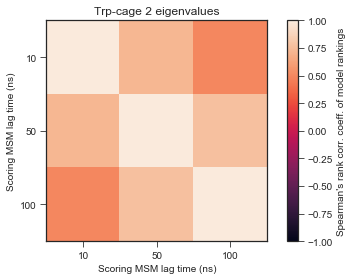

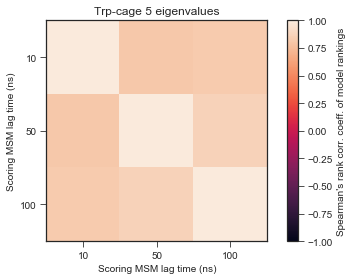

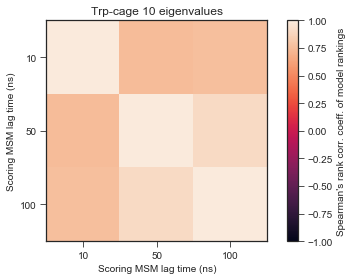

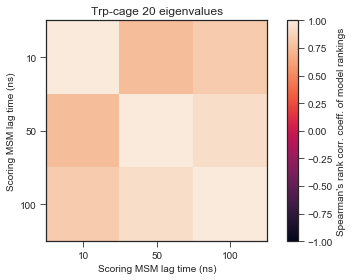

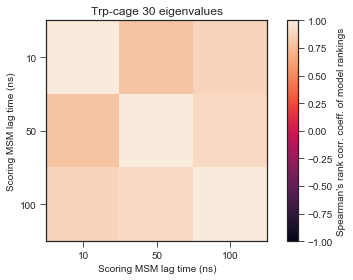

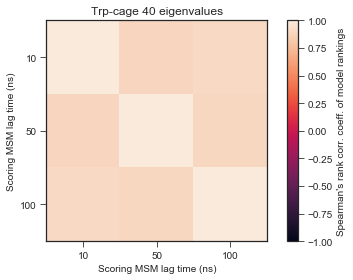

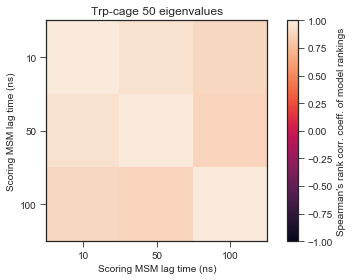

In [5]:
for k in range(len(eigenvalues)):
    plt.figure()
    plt.imshow(correlations[k], vmin=-1, vmax=1)
    cbar = plt.colorbar()
    plt.xticks([0,1,2], [10,50,100])
    plt.yticks([0,1,2], [10,50,100])
    plt.xlabel('Scoring MSM lag time (ns)')
    plt.ylabel('Scoring MSM lag time (ns)')
    cbar.set_label("Spearman's rank corr. coeff. of model rankings")
    plt.title('Trp-cage %d eigenvalues' % eigenvalues[k])
    plt.tight_layout()
    plt.savefig('trpcage_lag_rank_correlations_%deigen.png' % eigenvalues[k], dpi=300)
    plt.show()

In [17]:
# correlation_means = []

# for k in range(len(eigenvalues)):
#     correlation_means.append(np.mean(correlations[k]))

In [18]:
# plt.figure()
# plt.plot(correlation_means)
# plt.show()

In [19]:
correlation_means = []

for k in range(len(eigenvalues)):
    correlation_means.append((np.sum(correlations[k])-np.sum(np.diagonal(correlations[k])))/6)

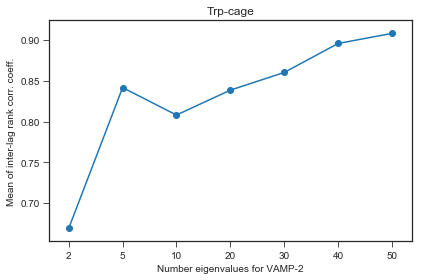

In [21]:
plt.figure()
plt.xlabel('Number eigenvalues for VAMP-2')
plt.ylabel('Mean of inter-lag rank corr. coeff.')
plt.xticks(range(7), [2,5,10,20,30,40,50])
plt.plot(correlation_means)
plt.scatter(range(7), correlation_means)
plt.title('Trp-cage')
plt.tight_layout()
plt.savefig('trpcage_lag_rank_correlations_mean.png', dpi=300)
plt.show()